In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
total = pd.read_csv("Feature_IP_total_HL12_N_190808.csv")

print(total.shape)
total.head()

(2131, 41)


,RT,Kh,Kv_Kh,So,INJP,VL,TS,HL,WD,LN,...,CO_FPT_18,SOR_FPT_18,CSOR_FPT_18,OR_FPT_24,CO_FPT_24,SOR_FPT_24,CSOR_FPT_24,T_FPP,T_FPT,T_Half
0,0.000000,0.4,0.6,0.7,0.428571,0.0,0.8,0.500000,0.500000,0.000000,...,0.291903,0.136608,0.091276,0.150168,0.304450,0.132310,0.103151,0.254545,0.328571,0.288288
1,0.666667,0.4,0.6,1.0,0.714286,1.0,0.2,0.500000,0.642857,0.833333,...,0.361870,0.181524,0.101515,0.360620,0.406142,0.122441,0.113191,0.290909,0.328571,0.270270
2,0.000000,0.5,0.4,1.0,0.714286,1.0,0.8,0.083333,0.821429,0.333333,...,0.537583,0.100531,0.045781,0.113809,0.533881,0.142852,0.057748,0.163636,0.385714,0.405405
3,1.000000,0.5,0.2,0.0,0.285714,1.0,0.2,0.083333,0.678571,0.666667,...,0.284420,0.168864,0.310306,0.437663,0.350945,0.139811,0.292962,0.072727,0.157143,0.153153
4,0.166667,0.6,0.2,0.4,0.857143,1.0,0.8,0.083333,0.464286,1.000000,...,0.263605,0.208092,0.239268,0.412811,0.328301,0.126547,0.232784,0.054545,0.114286,0.126126


In [3]:
SB_Input_FPT = ["RT", "Kh", "Kv_Kh", "So", "INJP", "VL", "TS",
                "T_FPP", "OR_FPP", "CO_FPP", "SOR_FPP", "CSOR_FPP",
                "T_FPT", "OR_FPT", "CO_FPT", "SOR_FPT", "CSOR_FPT",
                "T_Half", "OR_Half", "CO_Half", "SOR_Half", "CSOR_Half",
                "OR_FPT_6", "CO_FPT_6", "SOR_FPT_6", "CSOR_FPT_6",
                "OR_FPT_12", "CO_FPT_12", "SOR_FPT_12", "CSOR_FPT_12",
                "OR_FPT_18", "CO_FPT_18", "SOR_FPT_18", "CSOR_FPT_18",
                "OR_FPT_24", "CO_FPT_24", "SOR_FPT_24", "CSOR_FPT_24"]

shale_barrier = ["HL", "WD", "LN"]

In [4]:
SB_Input = total[SB_Input_FPT]

print(SB_Input.shape)
SB_Input.head()

(2131, 38)


,RT,Kh,Kv_Kh,So,INJP,VL,TS,T_FPP,OR_FPP,CO_FPP,...,SOR_FPT_12,CSOR_FPT_12,OR_FPT_18,CO_FPT_18,SOR_FPT_18,CSOR_FPT_18,OR_FPT_24,CO_FPT_24,SOR_FPT_24,CSOR_FPT_24
0,0.000000,0.4,0.6,0.7,0.428571,0.0,0.8,0.254545,0.316670,0.303891,...,0.133776,0.080910,0.135312,0.291903,0.136608,0.091276,0.150168,0.304450,0.132310,0.103151
1,0.666667,0.4,0.6,1.0,0.714286,1.0,0.2,0.290909,0.287898,0.370034,...,0.100298,0.092569,0.239885,0.361870,0.181524,0.101515,0.360620,0.406142,0.122441,0.113191
2,0.000000,0.5,0.4,1.0,0.714286,1.0,0.8,0.163636,0.404115,0.248112,...,0.040770,0.039603,0.147104,0.537583,0.100531,0.045781,0.113809,0.533881,0.142852,0.057748
3,1.000000,0.5,0.2,0.0,0.285714,1.0,0.2,0.072727,0.256827,0.108559,...,0.216474,0.326482,0.328677,0.284420,0.168864,0.310306,0.437663,0.350945,0.139811,0.292962
4,0.166667,0.6,0.2,0.4,0.857143,1.0,0.8,0.054545,0.328720,0.082300,...,0.234068,0.239579,0.325006,0.263605,0.208092,0.239268,0.412811,0.328301,0.126547,0.232784


In [5]:
SB_Output = total[shale_barrier]

print(SB_Output.shape)
SB_Output.head()

(2131, 3)


,HL,WD,LN
0,0.500000,0.500000,0.000000
1,0.500000,0.642857,0.833333
2,0.083333,0.821429,0.333333
3,0.083333,0.678571,0.666667
4,0.083333,0.464286,1.000000


In [6]:
X_train_FPT = SB_Input[:1600]
X_test_FPT = SB_Input[1600:]

print(X_train_FPT.shape)
print(X_test_FPT.shape)

(1600, 38)
(531, 38)


In [7]:
Y_train = SB_Output[:1600]
Y_test = SB_Output[1600:]

print(Y_train.shape)
print(Y_test.shape)

(1600, 3)
(531, 3)


In [8]:
HL_train = Y_train["HL"]
WD_train = Y_train["WD"]
LN_train = Y_train["LN"]
HL_test = Y_test["HL"]
WD_test = Y_test["WD"]
LN_test = Y_test["LN"]

In [9]:
HL_train_pd = pd.DataFrame(HL_train)
WD_train_pd = pd.DataFrame(WD_train)
LN_train_pd = pd.DataFrame(LN_train)
HL_test_pd = pd.DataFrame(HL_test)
WD_test_pd = pd.DataFrame(WD_test)
LN_test_pd = pd.DataFrame(LN_test)

In [10]:
input_dim_FPT = X_train_FPT.shape[1]
input_dim_FPT

38

## ANN_L2_L2

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.initializers import he_uniform, glorot_uniform, Ones, RandomUniform
from keras.optimizers import SGD, Nadam, RMSprop, Adam
from sklearn.metrics import r2_score
from keras.utils import plot_model, np_utils
from keras import models, layers

C:\Users\KM\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

In [13]:
# No. 1

Layer_1 = 250
Layer_2 = 50
dropout_1 = 0.2
dropout_2 = 0.3
Activation_1 = 'elu'
Activation_2 = 'selu'
LeanringRate = 0.0007
Op_val_epoch = 3000
num_epochs = 100

In [14]:
def PCA_FPT(Layer_1, Layer_2, dropout_1, dropout_2, Activation_1, Activation_2, LeanringRate):

    model_FPT = models.Sequential()
    initializer = he_uniform(seed=710)
    model_FPT.add(layers.Dense(Layer_1, kernel_initializer=initializer, activation = Activation_1, input_dim=input_dim_FPT))
    model_FPT.add(layers.Dense(Layer_1, kernel_initializer=initializer, activation = Activation_1))
    model_FPT.add(Dropout(dropout_1))
    model_FPT.add(layers.Dense(Layer_2, kernel_initializer=initializer, activation = Activation_2))
    model_FPT.add(layers.Dense(Layer_2, kernel_initializer=initializer, activation = Activation_2))
    model_FPT.add(Dropout(dropout_2))
    model_FPT.add(layers.Dense(3, kernel_initializer=initializer, activation = 'linear'))
    model_FPT.load_weights("Optimal_ANN_L2_L2_190812.h5")
    
    optimizers = Adam(lr=LeanringRate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)
    model_FPT.compile(optimizer=optimizers, loss='mae', metrics=['mse'])
    
    return model_FPT

In [15]:
model_SB = PCA_FPT(Layer_1, Layer_2, dropout_1, dropout_2, Activation_1, Activation_2, LeanringRate)
history_SB = model_SB.fit(X_train_FPT, Y_train, epochs=num_epochs, batch_size=500, verbose=2,
                          validation_data=(X_test_FPT, Y_test))

Train on 1600 samples, validate on 531 samples
Epoch 1/100
 - 1s - loss: 0.0806 - mean_squared_error: 0.0119 - val_loss: 0.0932 - val_mean_squared_error: 0.0169
Epoch 2/100
 - 0s - loss: 0.0762 - mean_squared_error: 0.0105 - val_loss: 0.0931 - val_mean_squared_error: 0.0170
Epoch 3/100
 - 0s - loss: 0.0745 - mean_squared_error: 0.0102 - val_loss: 0.0887 - val_mean_squared_error: 0.0158
Epoch 4/100
 - 0s - loss: 0.0734 - mean_squared_error: 0.0099 - val_loss: 0.0884 - val_mean_squared_error: 0.0158
Epoch 5/100
 - 0s - loss: 0.0715 - mean_squared_error: 0.0095 - val_loss: 0.0877 - val_mean_squared_error: 0.0156
Epoch 6/100
 - 0s - loss: 0.0695 - mean_squared_error: 0.0090 - val_loss: 0.0879 - val_mean_squared_error: 0.0155
Epoch 7/100
 - 0s - loss: 0.0689 - mean_squared_error: 0.0090 - val_loss: 0.0872 - val_mean_squared_error: 0.0155
Epoch 8/100
 - 0s - loss: 0.0696 - mean_squared_error: 0.0092 - val_loss: 0.0870 - val_mean_squared_error: 0.0155
Epoch 9/100
 - 0s - loss: 0.0687 - mean_s

Epoch 72/100
 - 0s - loss: 0.0684 - mean_squared_error: 0.0089 - val_loss: 0.0873 - val_mean_squared_error: 0.0155
Epoch 73/100
 - 0s - loss: 0.0676 - mean_squared_error: 0.0085 - val_loss: 0.0873 - val_mean_squared_error: 0.0155
Epoch 74/100
 - 0s - loss: 0.0684 - mean_squared_error: 0.0088 - val_loss: 0.0873 - val_mean_squared_error: 0.0155
Epoch 75/100
 - 0s - loss: 0.0661 - mean_squared_error: 0.0084 - val_loss: 0.0873 - val_mean_squared_error: 0.0155
Epoch 76/100
 - 0s - loss: 0.0670 - mean_squared_error: 0.0085 - val_loss: 0.0871 - val_mean_squared_error: 0.0155
Epoch 77/100
 - 0s - loss: 0.0663 - mean_squared_error: 0.0084 - val_loss: 0.0869 - val_mean_squared_error: 0.0154
Epoch 78/100
 - 0s - loss: 0.0685 - mean_squared_error: 0.0089 - val_loss: 0.0869 - val_mean_squared_error: 0.0154
Epoch 79/100
 - 0s - loss: 0.0659 - mean_squared_error: 0.0084 - val_loss: 0.0869 - val_mean_squared_error: 0.0154
Epoch 80/100
 - 0s - loss: 0.0673 - mean_squared_error: 0.0084 - val_loss: 0.086

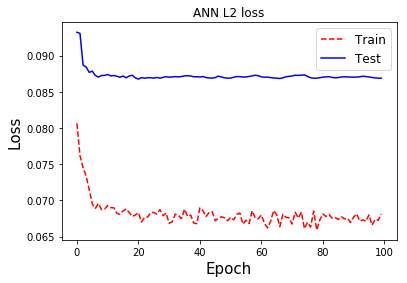

In [16]:
plt.plot(history_SB.history['loss'], 'r--')
plt.plot(history_SB.history['val_loss'], 'b')
plt.title('ANN L2 loss')
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
# plt.axis([10, 3000, 0.05, 0.16])
plt.legend(['Train', 'Test'], loc='upper right', fontsize = 12)
# plt.savefig('Optimal_ANN_L2_L2.png', bbox_inches='tight')

In [17]:
score_train_SB = model_SB.evaluate(X_train_FPT, Y_train, verbose=0)
score_test_SB = model_SB.evaluate(X_test_FPT, Y_test, verbose=0)

print('Train loss:', score_train_SB[0])
print('Train MSE:', score_train_SB[1])
print("---------------------")
print('Test loss:', score_test_SB[0])
print('Test MSE:', score_test_SB[1])

Train loss: 0.049776930287480356
Train MSE: 0.005593558428809047
---------------------
Test loss: 0.0868897121364563
Test MSE: 0.015497201513463944


In [18]:
Predictions_train_SB = model_SB.predict(X_train_FPT)
Predictions_test_SB = model_SB.predict(X_test_FPT)
Predictions_train_SB_pd = pd.DataFrame(Predictions_train_SB)
Predictions_test_SB_pd = pd.DataFrame(Predictions_test_SB)

Pred_train_HL = Predictions_train_SB_pd[0]
Pred_train_WD = Predictions_train_SB_pd[1]
Pred_train_LN = Predictions_train_SB_pd[2]
Pred_test_HL = Predictions_test_SB_pd[0]
Pred_test_WD = Predictions_test_SB_pd[1]
Pred_test_LN = Predictions_test_SB_pd[2]

Pred_train_HL_pd = pd.DataFrame(Pred_train_HL)
Pred_train_WD_pd = pd.DataFrame(Pred_train_WD)
Pred_train_LN_pd = pd.DataFrame(Pred_train_LN)
Pred_test_HL_pd = pd.DataFrame(Pred_test_HL)
Pred_test_WD_pd = pd.DataFrame(Pred_test_WD)
Pred_test_LN_pd = pd.DataFrame(Pred_test_LN)

In [19]:
from sklearn.metrics import r2_score

R2_HL_train = r2_score(HL_train_pd, Pred_train_HL_pd)
R2_WD_train = r2_score(WD_train_pd, Pred_train_WD_pd)
R2_LN_train = r2_score(LN_train_pd, Pred_train_LN_pd)
R2_HL_test = r2_score(HL_test_pd, Pred_test_HL_pd)
R2_WD_test = r2_score(WD_test_pd, Pred_test_WD_pd)
R2_LN_test = r2_score(LN_test_pd, Pred_test_LN_pd)

print("---------------------")
print('Train HL R2:', R2_HL_train)
print('Test HL R2:', R2_HL_test)
print("---------------------")
print('Train WD R2:', R2_WD_train)
print('Test WD R2:', R2_WD_test)
print("---------------------")
print('Train LN R2:', R2_LN_train)
print('Test LN R2:', R2_LN_test)

---------------------
Train HL R2: 0.8732483064028218
Test HL R2: 0.5743942428422724
---------------------
Train WD R2: 0.9380168287876304
Test WD R2: 0.8758652876070027
---------------------
Train LN R2: 0.9612483862479296
Test LN R2: 0.9188013442067253


In [20]:
from sklearn.metrics import mean_absolute_error

MAE_HL_train = mean_absolute_error(HL_train_pd, Pred_train_HL_pd)
MAE_WD_train = mean_absolute_error(WD_train_pd, Pred_train_WD_pd)
MAE_LN_train = mean_absolute_error(LN_train_pd, Pred_train_LN_pd)
MAE_HL_test = mean_absolute_error(HL_test_pd, Pred_test_HL_pd)
MAE_WD_test = mean_absolute_error(WD_test_pd, Pred_test_WD_pd)
MAE_LN_test = mean_absolute_error(LN_test_pd, Pred_test_LN_pd)

print("---------------------")
print('Train HL MAE:', MAE_HL_train)
print('Test HL MAE:', MAE_HL_test)
print("---------------------")
print('Train WD MAE:', MAE_WD_train)
print('Test WD MAE:', MAE_WD_test)
print("---------------------")
print('Train LN MAE:', MAE_LN_train)
print('Test LN MAE:', MAE_LN_test)

---------------------
Train HL MAE: 0.06601698670304812
Test HL MAE: 0.1352787604022987
---------------------
Train WD MAE: 0.03761019151090804
Test WD MAE: 0.05735596141652755
---------------------
Train LN MAE: 0.04570361353161189
Test LN MAE: 0.06803441458114916


In [21]:
from sklearn.metrics import mean_squared_error

MSE_HL_train = mean_squared_error(HL_train_pd, Pred_train_HL_pd)
MSE_WD_train = mean_squared_error(WD_train_pd, Pred_train_WD_pd)
MSE_LN_train = mean_squared_error(LN_train_pd, Pred_train_LN_pd)
MSE_HL_test = mean_squared_error(HL_test_pd, Pred_test_HL_pd)
MSE_WD_test = mean_squared_error(WD_test_pd, Pred_test_WD_pd)
MSE_LN_test = mean_squared_error(LN_test_pd, Pred_test_LN_pd)

print("---------------------")
print('Train HL MSE:', MSE_HL_train)
print('Test HL MSE:', MSE_HL_test)
print("---------------------")
print('Train WD MSE:', MSE_WD_train)
print('Test WD MSE:', MSE_WD_test)
print("---------------------")
print('Train LN MSE:', MSE_LN_train)
print('Test LN MSE:', MSE_LN_test)

---------------------
Train HL MSE: 0.009500738111641786
Test HL MSE: 0.031318803144815
---------------------
Train WD MSE: 0.002996424690715102
Test WD MSE: 0.005911066717328041
---------------------
Train LN MSE: 0.004283512811091711
Test LN MSE: 0.009261734822652828


In [22]:
# model_SB.save('Optimal_ANN_L2_L2_190812.h5')

In [23]:
HL_train_pd_up = HL_train_pd * 12
Pred_train_HL_pd_up = Pred_train_HL_pd * 12

WD_train_pd_up = (WD_train_pd * 56) + 42
Pred_train_WD_pd_up = (Pred_train_WD_pd * 56) + 42

LN_train_pd_up = (LN_train_pd * 240) + 520
Pred_train_LN_pd_up = (Pred_train_LN_pd * 240) + 520

In [24]:
HL_test_up = HL_test_pd * 12
HL_test_up = np.array(HL_test_up)
HL_test_pd_up = pd.DataFrame(HL_test_up)
Pred_test_HL_pd_up = Pred_test_HL_pd * 12

WD_test_up = (WD_test_pd * 56) + 42
WD_test_up = np.array(WD_test_up)
WD_test_pd_up = pd.DataFrame(WD_test_up)
Pred_test_WD_pd_up = (Pred_test_WD_pd * 56) + 42

LN_test_up = (LN_test_pd * 240) + 520
LN_test_up = np.array(LN_test_up)
LN_test_pd_up = pd.DataFrame(LN_test_up)
Pred_test_LN_pd_up = (Pred_test_LN_pd * 240) + 520

In [25]:
Results_train = pd.concat([HL_train_pd_up.round(0), Pred_train_HL_pd_up.round(0),
                               WD_train_pd_up.round(0), Pred_train_WD_pd_up.round(0),
                               LN_train_pd_up.round(0), Pred_train_LN_pd_up.round(0)],
                               axis=1, ignore_index=True)

In [26]:
Results_test = pd.concat([HL_test_pd_up.round(0), Pred_test_HL_pd_up.round(0),
                              WD_test_pd_up.round(0), Pred_test_WD_pd_up.round(0),
                              LN_test_pd_up.round(0), Pred_test_LN_pd_up.round(0)], 
                              axis=1, ignore_index=True)

In [27]:
Results_train.head()
print(Results_train.shape)

(1600, 6)


In [28]:
Results_test.head()
print(Results_test.shape)

(531, 6)


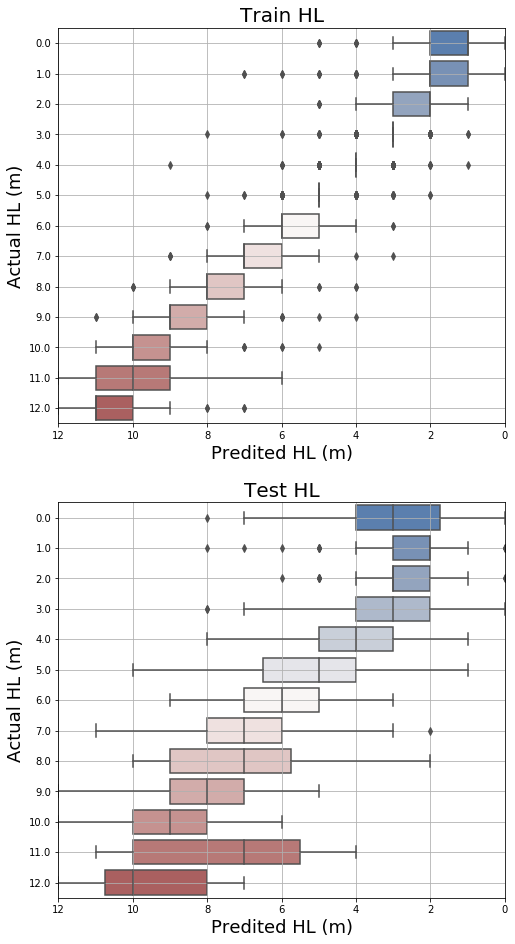

In [29]:
import seaborn as sns

figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8, 16)

sns.boxplot(x=Results_train[1], y=Results_train[0], 
            data=Results_train, palette="vlag", orient="h", ax=ax1)
sns.boxplot(x=Results_test[1], y=Results_test[0], 
            data=Results_test, palette="vlag", orient="h", ax=ax2)

ax1.set_xlabel("Predited HL (m)",fontsize=18)
ax2.set_xlabel("Predited HL (m)",fontsize=18)
ax1.set_ylabel("Actual HL (m)",fontsize=18)
ax2.set_ylabel("Actual HL (m)",fontsize=18)
ax1.set_title('Train HL',fontsize=20)
ax2.set_title('Test HL',fontsize=20)
ax1.set_xlim(12, 0)
ax2.set_xlim(12, 0)
ax1.grid()
ax2.grid()

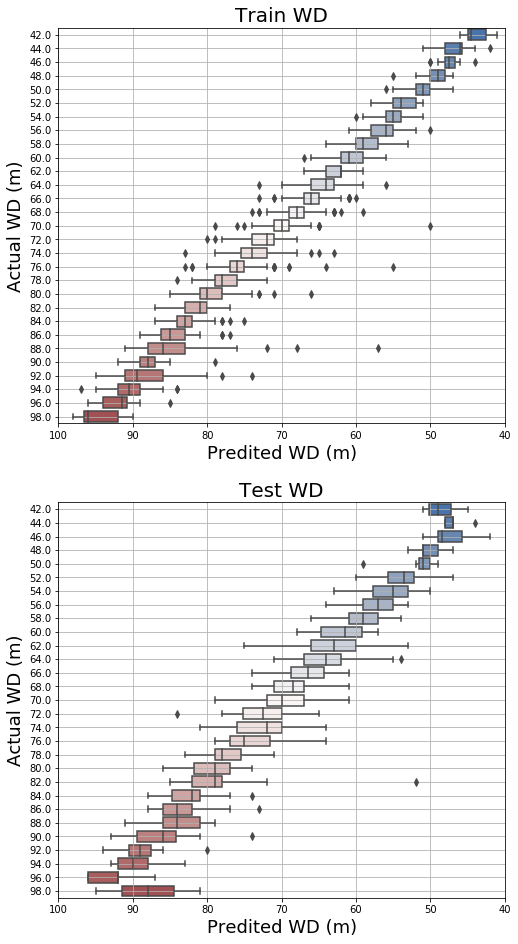

In [30]:
import seaborn as sns

figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8, 16)

sns.boxplot(x=Results_train[3], y=Results_train[2], 
            data=Results_train, palette="vlag", orient="h", ax=ax1)
sns.boxplot(x=Results_test[3], y=Results_test[2], 
            data=Results_test, palette="vlag", orient="h", ax=ax2)

ax1.set_xlabel("Predited WD (m)",fontsize=18)
ax2.set_xlabel("Predited WD (m)",fontsize=18)
ax1.set_ylabel("Actual WD (m)",fontsize=18)
ax2.set_ylabel("Actual WD (m)",fontsize=18)
ax1.set_title('Train WD',fontsize=20)
ax2.set_title('Test WD',fontsize=20)
ax1.set_xlim(100, 40)
ax2.set_xlim(100, 40)
ax1.grid()
ax2.grid()

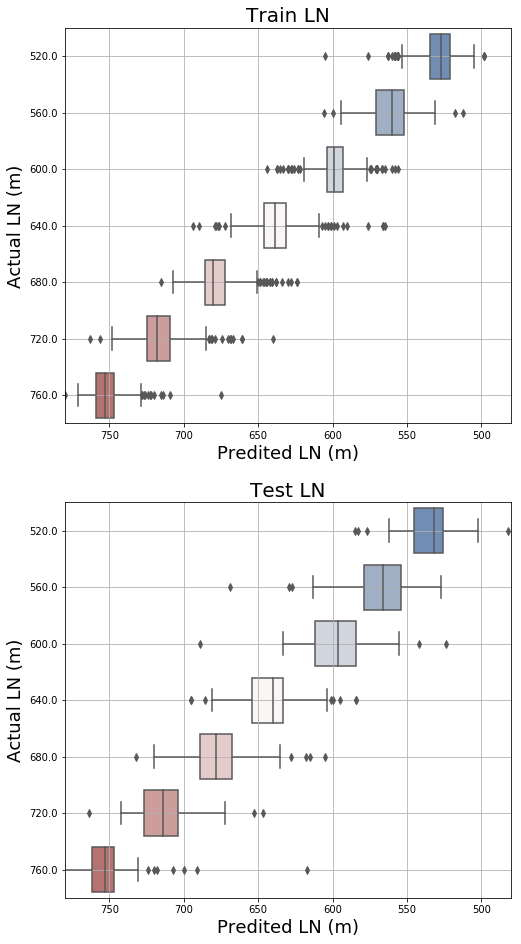

In [31]:
import seaborn as sns

figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8, 16)

sns.boxplot(x=Results_train[5], y=Results_train[4], 
            data=Results_train, palette="vlag", orient="h", ax=ax1)
sns.boxplot(x=Results_test[5], y=Results_test[4], 
            data=Results_test, palette="vlag", orient="h", ax=ax2)

ax1.set_xlabel("Predited LN (m)",fontsize=18)
ax2.set_xlabel("Predited LN (m)",fontsize=18)
ax1.set_ylabel("Actual LN (m)",fontsize=18)
ax2.set_ylabel("Actual LN (m)",fontsize=18)
ax1.set_title('Train LN',fontsize=20)
ax2.set_title('Test LN',fontsize=20)
ax1.set_xlim(780, 480)
ax2.set_xlim(780, 480)
ax1.grid()
ax2.grid()

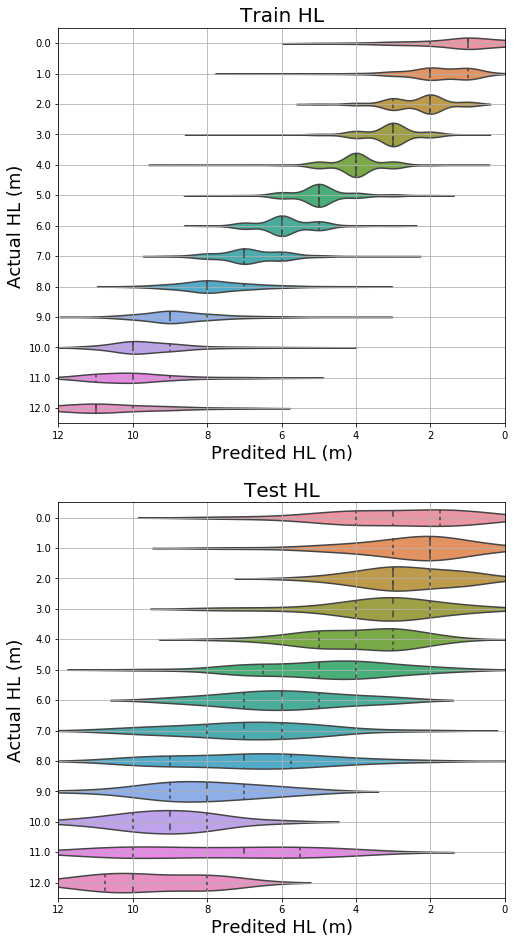

In [32]:
import seaborn as sns

figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8, 16)

sns.violinplot(x=Results_train[1], y=Results_train[0],
               split=True, inner="quart", data=Results_train, orient="h", ax=ax1)
sns.violinplot(x=Results_test[1], y=Results_test[0],
               split=True, inner="quart", data=Results_test, orient="h", ax=ax2)

ax1.set_xlabel("Predited HL (m)",fontsize=18)
ax2.set_xlabel("Predited HL (m)",fontsize=18)
ax1.set_ylabel("Actual HL (m)",fontsize=18)
ax2.set_ylabel("Actual HL (m)",fontsize=18)
ax1.set_title('Train HL',fontsize=20)
ax2.set_title('Test HL',fontsize=20)
ax1.set_xlim(12, 0)
ax2.set_xlim(12, 0)
ax1.grid()
ax2.grid()

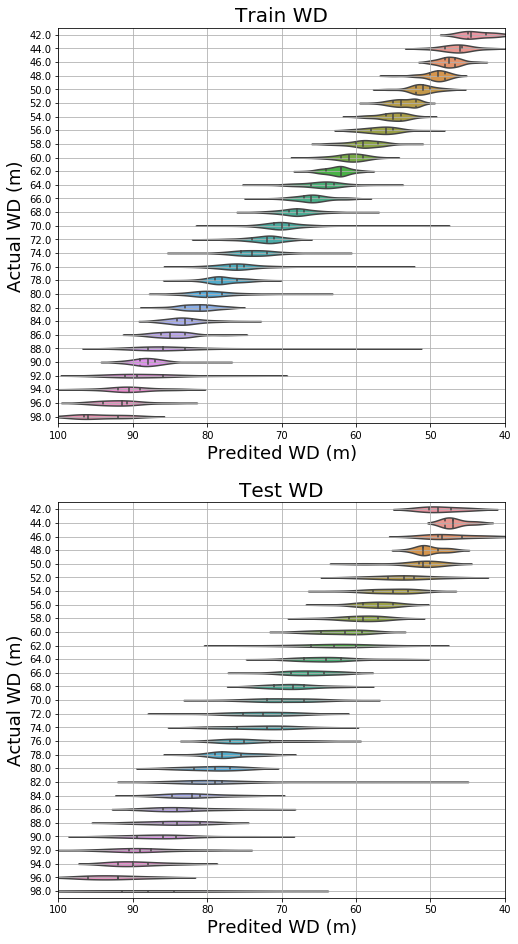

In [33]:
import seaborn as sns

figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8, 16)

sns.violinplot(x=Results_train[3], y=Results_train[2],
               split=True, inner="quart", data=Results_train, orient="h", ax=ax1)
sns.violinplot(x=Results_test[3], y=Results_test[2],
               split=True, inner="quart", data=Results_test, orient="h", ax=ax2)

ax1.set_xlabel("Predited WD (m)",fontsize=18)
ax2.set_xlabel("Predited WD (m)",fontsize=18)
ax1.set_ylabel("Actual WD (m)",fontsize=18)
ax2.set_ylabel("Actual WD (m)",fontsize=18)
ax1.set_title('Train WD',fontsize=20)
ax2.set_title('Test WD',fontsize=20)
ax1.set_xlim(100, 40)
ax2.set_xlim(100, 40)
ax1.grid()
ax2.grid()

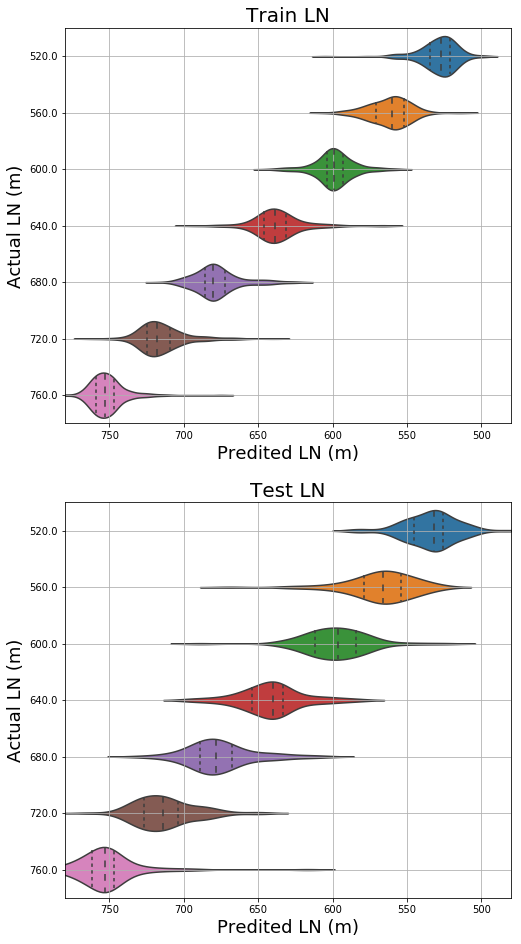

In [34]:
import seaborn as sns

figure, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(8, 16)

sns.violinplot(x=Results_train[5], y=Results_train[4],
               split=True, inner="quart", data=Results_train, orient="h", ax=ax1)
sns.violinplot(x=Results_test[5], y=Results_test[4],
               split=True, inner="quart", data=Results_test, orient="h", ax=ax2)

ax1.set_xlabel("Predited LN (m)",fontsize=18)
ax2.set_xlabel("Predited LN (m)",fontsize=18)
ax1.set_ylabel("Actual LN (m)",fontsize=18)
ax2.set_ylabel("Actual LN (m)",fontsize=18)
ax1.set_title('Train LN',fontsize=20)
ax2.set_title('Test LN',fontsize=20)
ax1.set_xlim(780, 480)
ax2.set_xlim(780, 480)
ax1.grid()
ax2.grid()

## Field Application

In [35]:
Field = pd.read_csv("Feature_Sunrise_Firebag_N_V1.csv")

print(Field.shape)
Field.head(6)

(6, 39)


,ID,RT,Kh,Kv_Kh,So,INJP,VL,TS,OR_FPP,CO_FPP,...,CO_FPT_18,SOR_FPT_18,CSOR_FPT_18,OR_FPT_24,CO_FPT_24,SOR_FPT_24,CSOR_FPT_24,T_FPP,T_Half,T_FPT
0,Sunrise_13_08_P1,-0.333333,0.100000,0.48,0.64,0.121429,0.5,0.8,0.109193,0.066760,...,0.023468,0.258825,0.216399,0.035248,0.028140,0.213048,0.225559,0.254545,0.214286,0.144144
1,Sunrise_13_08_P7,-0.333333,0.100000,0.48,0.64,0.121429,0.5,0.8,0.135091,0.065973,...,0.097068,0.201224,0.180455,-0.012364,0.099692,0.337965,0.198576,0.163636,0.200000,0.180180
2,Sunrise_08_17_P2,-0.333333,0.100000,0.48,0.56,0.150000,0.5,0.8,0.110592,0.018764,...,0.028307,0.136779,0.204999,0.028858,0.034994,0.211283,0.215613,0.054545,0.085714,0.081081
3,Firebag_104P09,0.833333,0.285714,0.40,0.84,0.571429,0.5,1.0,0.326965,0.161884,...,0.256093,0.150062,0.112586,0.187002,0.286806,0.093136,0.119634,0.145455,0.200000,0.180180
4,Firebag_104P10,0.833333,0.285714,0.40,0.84,0.571429,0.5,1.0,0.311372,0.160918,...,0.264052,0.093120,0.128683,0.197383,0.301091,0.152757,0.133228,0.145455,0.214286,0.189189
5,Firebag_107P14,0.333333,0.285714,0.40,0.80,0.571429,1.0,1.0,0.559448,0.540827,...,0.538984,0.071481,0.050767,0.133076,0.551851,0.165120,0.066203,0.327273,0.385714,0.324324


In [36]:
SB_Input_parameters_Field = Field[SB_Input_FPT]

print(SB_Input_parameters_Field.shape)

(6, 38)


In [37]:
X_Field_FPT = SB_Input_parameters_Field[:]

print(X_Field_FPT.shape)

(6, 38)


In [38]:
X_Field_FPT.head()

,RT,Kh,Kv_Kh,So,INJP,VL,TS,T_FPP,OR_FPP,CO_FPP,...,SOR_FPT_12,CSOR_FPT_12,OR_FPT_18,CO_FPT_18,SOR_FPT_18,CSOR_FPT_18,OR_FPT_24,CO_FPT_24,SOR_FPT_24,CSOR_FPT_24
0,-0.333333,0.100000,0.48,0.64,0.121429,0.5,0.8,0.254545,0.109193,0.066760,...,0.153127,0.215465,0.022705,0.023468,0.258825,0.216399,0.035248,0.028140,0.213048,0.225559
1,-0.333333,0.100000,0.48,0.64,0.121429,0.5,0.8,0.163636,0.135091,0.065973,...,0.161495,0.173468,0.113411,0.097068,0.201224,0.180455,-0.012364,0.099692,0.337965,0.198576
2,-0.333333,0.100000,0.48,0.56,0.150000,0.5,0.8,0.054545,0.110592,0.018764,...,0.199103,0.213645,0.082687,0.028307,0.136779,0.204999,0.028858,0.034994,0.211283,0.215613
3,0.833333,0.285714,0.40,0.84,0.571429,0.5,1.0,0.145455,0.326965,0.161884,...,0.127478,0.107176,0.211450,0.256093,0.150062,0.112586,0.187002,0.286806,0.093136,0.119634
4,0.833333,0.285714,0.40,0.84,0.571429,0.5,1.0,0.145455,0.311372,0.160918,...,0.087693,0.128369,0.243240,0.264052,0.093120,0.128683,0.197383,0.301091,0.152757,0.133228


In [39]:
Predictions_field = model_SB.predict(X_Field_FPT)
Predictions_field_pd = pd.DataFrame(Predictions_field)

Pred_field_HL = Predictions_field_pd[0]
Pred_field_WD = Predictions_field_pd[1]
Pred_field_LN = Predictions_field_pd[2]

Pred_field_HL_pd = pd.DataFrame(Pred_field_HL)
Pred_field_WD_pd = pd.DataFrame(Pred_field_WD)
Pred_field_LN_pd = pd.DataFrame(Pred_field_LN)

In [40]:
Pred_field_HL_pd_up = Pred_field_HL_pd * 12
Pred_field_WD_pd_up = (Pred_field_WD_pd * 56) + 42
Pred_field_LN_pd_up = (Pred_field_LN_pd * 240) + 520

In [41]:
Results_field_Sunrise = pd.concat([Pred_field_HL_pd_up.round(0), 
                                   Pred_field_WD_pd_up.round(0), 
                                   Pred_field_LN_pd_up.round(0)], axis=1, ignore_index=True)

In [42]:
Results_field_Sunrise

,0,1,2
0,-2.0,42.0,725.0
1,8.0,61.0,652.0
2,-2.0,38.0,714.0
3,7.0,62.0,688.0
4,-1.0,52.0,700.0
5,2.0,76.0,511.0
